<a href="https://colab.research.google.com/github/nrjcs/foundation_aiml/blob/master/CONV_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary Packages
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import mnist
import matplotlib.pyplot as plt
import keras.utils



In [2]:
# Get the dataset

(X_train, Y_train), (X_test, Y_test) = mnist.load_data() 	#Keras function

print ("mnist data downloaded...")


mnist data downloaded...


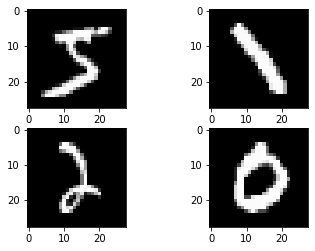

In [3]:
# This code cell is for visualization of data only...may be skipped

# plot images...subplot function is being used...nice documentation is available on the official webpage of matplotlib
# arguments to subplot functions are number of rows, number of columns and 
# number of subplots in the plot...comma is mandatory if values are less than 10

plt.subplot(221)	
plt.imshow(X_train[0], cmap=plt.get_cmap('gray')) # ploting first image of training data set
plt.subplot(222)
plt.imshow(X_train[134], cmap=plt.get_cmap('gray'))	# ploting 135th image in training data set
plt.subplot(223)
plt.imshow(X_test[244], cmap=plt.get_cmap('gray'))	# ploting 244rth image of test date set
plt.subplot(224)
plt.imshow(X_test[3], cmap=plt.get_cmap('gray'))	# ploting 4th image of test data set

# show the plot
plt.show()


In [4]:
# Print shape of dataset..it will print three tuples, namely the no. of images in dataset, height and width(60000, 28, 28)

print (X_train.shape)

(60000, 28, 28)


In [5]:
print (Y_train.shape)

(60000,)


In [23]:
# Do basic preprocessing of the training data

# reshaping the data 
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

for_final_test = X_test # we will use this for running predictions

# Change the data type from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize the images
X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print(X_train.shape[0], 'training samples')
print(X_test.shape[0], 'test samples')


X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)
60000 training samples
10000 test samples


In [7]:
# Convert the class labels to one hot encoded matrix

num_classes = 10 # number of classess for classification 

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

print (Y_train.shape)


(60000, 10)


In [8]:
# Define model architecture

rows, cols = 28,28
input_shape = (rows, cols, 1)
model = Sequential()

#arch 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) #Flattens the input, Why ? because we need to connect it to Dense layer
model.add(Dense(num_classes, activation='softmax'))

# another architecture...you may experiment with the following architecture
#arch 2
#model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Flatten()) # Flattens the input
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(num_classes, activation='softmax'))

print ("keep going...")

keep going...


In [11]:
# compiling model

model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])

print ("compile successful...")

compile successful...


In [13]:
# print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                92170     
Total params: 110,986
Trainable params: 110,986
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
# Now we train the model

batch_size = 128
epochs = 2

# start the training

history=model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)

print ("training done...")


Epoch 1/2
375/375 [==============================] - 103s 276ms/step - loss: 2.2915 - accuracy: 0.0834 - val_loss: 2.2769 - val_accuracy: 0.0972
Epoch 2/2
375/375 [==============================] - 104s 277ms/step - loss: 2.2608 - accuracy: 0.1510 - val_loss: 2.2429 - val_accuracy: 0.2311
training done...


In [14]:
# Evaluate the model

score = model.evaluate(X_test, Y_test, verbose=1)
print('loss:', score[0])
print('accuracy:', score[1])

313/313 [==============================] - 7s 22ms/step - loss: 2.2445 - accuracy: 0.2086
loss: 2.244516372680664
accuracy: 0.2085999995470047


In [59]:
sample = for_final_test[0,:,:,:]
sample = sample.reshape(1,28,28,1)
sample.shape
print(Y_test[0])
model.predict_classes(sample)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


array([5])

In [20]:
#printing metrices
print (model.metrics_names)

# list all data in history
print(history.history.keys())


['loss', 'accuracy']
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


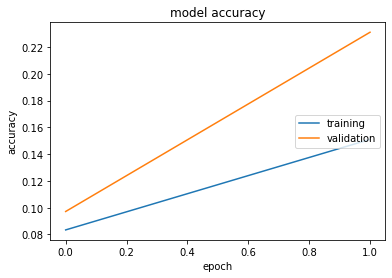

In [19]:
# to visualize the performance with plots...plot loss and accuracy in training and validation 

# Plot for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='center right')
plt.show()

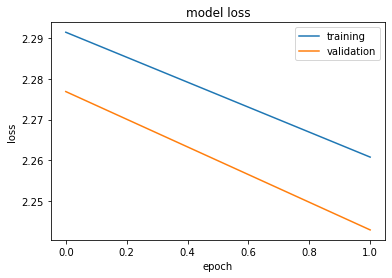

In [21]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()